In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [2]:
file_list

['../data/raw\\1_2025-06-22_18-24.csv', '../data/raw\\1_2025-06-22_18-25.csv']

In [3]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [5]:
main_dataframe.head(5)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,CENTURY 21 Столичная недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/318935572/,Москва,sale,flat,7,23,1,37.5,-1,0,25500000,Хорошево-Мневники,Шелепихинская набережная,40к2,Шелепиха,Sydney City
1,Павел Пряжников,realtor,https://www.cian.ru/sale/flat/318485986/,Москва,sale,flat,6,17,1,39.5,-1,0,17500000,Черемушки,Цюрупы,18К1,Новые Черёмушки,NaN
2,ID 47523409,homeowner,https://www.cian.ru/sale/flat/318873074/,Москва,sale,flat,17,17,1,38.4,-1,0,10500000,Марьино,Новомарьинская,13,Братиславская,NaN
3,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,34900000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
4,ID 117472686,homeowner,https://www.cian.ru/sale/flat/316499489/,Москва,sale,flat,8,9,1,35.0,-1,0,23800000,Хамовники,Ростовская набережная,3,Смоленская,NaN


In [6]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

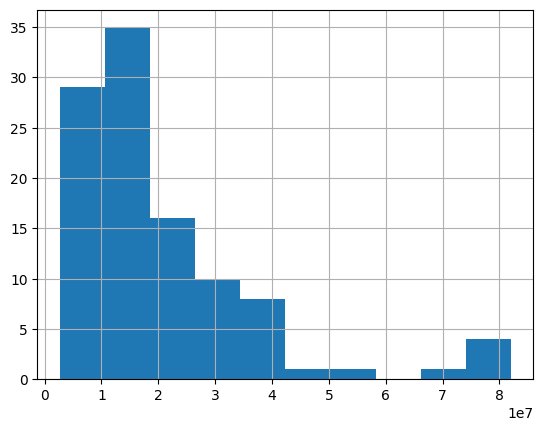

In [7]:
new_dataframe['price'].hist()

In [8]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

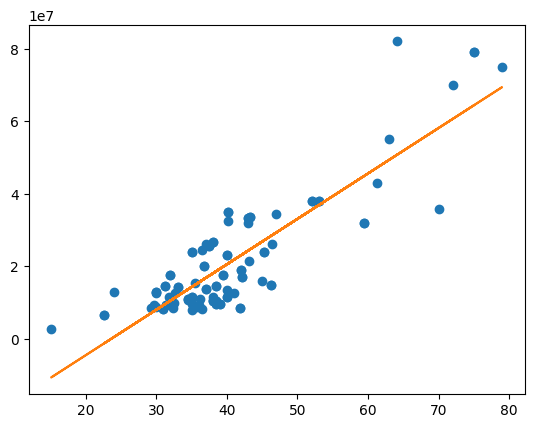

In [9]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [10]:
new_df.to_csv('../data/processed/train.csv', index=False)